# Discovery and Learning with Big Data/Machine Learning
### Austin Glenn
### Machine Learning Supervised Linear Regression

### Supervised Learning Workflow

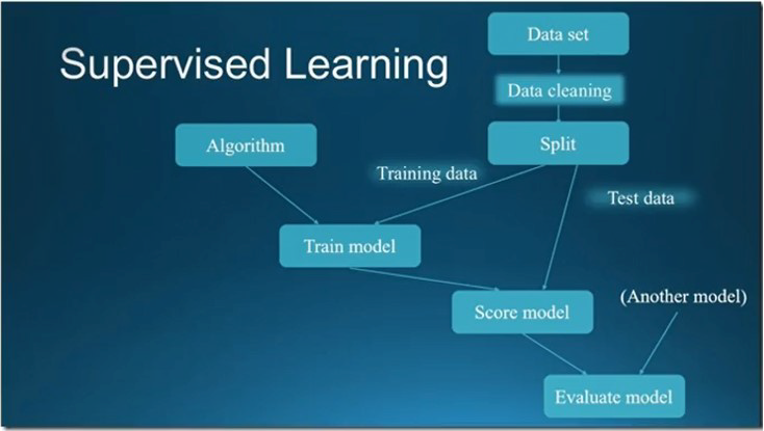
- You can see in this picture that supervised learning startw with the data set.  Remember since it is supervised, the data is labeled.  Then there is some data preprocessing (cleaning) to be done.  Next, you will declare your input (X/Indepentdent variables) and output (Target Variable/Dependent or Y) NumPy Arrays.  Then the data is split into a testing and training set.  Then you will build and train the model, use the model for predictions, and lastly, evaluate/validate the model.  So let's begin.

## <span style= 'color: red'>1. What is happening in the code block below? Enter your answer by adding a new code block and use markdown.</span>

Importing pandas library as standard 'pd'
Importing numpy library as standard 'np'
Importing the necessary librarys to perform certain functions 

## <span style= 'color: red'>2. What is the Pandas libarary used for?  Enter your answer by adding a new code block and use markdown.</span> 

Pandas library is used for data manipulation and anlaysis 

##  <span style= 'color: red'>3. What is the Matplotlib library used for?  Enter your answer by adding a new code block and use markdown.</span>

Matplotlib is used as a plotting tool using object oriented API for graphical representations 

## <span style= 'color: red'>4. What is the Seaborn library used for?  Enter your answer by adding a new code block and use markdown.</span>

Seaborn library is used for visualzation from the data built on the matplotlib functionality

In [3]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

### Description of Boston Housing Dataset ['https://www.kaggle.com/c/boston-housing']

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per 10,000 dollars
- PTRATIO: This is the pupil-teacher ratio by town
- AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

##  <span style= 'color: red'>5. What is happening in the code block below question 6? Enter your answer by adding a new code block and use markdown.</span>

The dataset 'housing_boston.csv' is being loaded into a variable called housingfile

##  <span style= 'color: red'>6. What is the dataset that is loading?  Enter your answer by adding a new code block and use markdown.</span>

A csv file called 'housing_boston.csv' that contains information regarding crime rate by town / rooms per dwelling / accessibility to radial highways etc... 

In [7]:
# Specify location of the dataset.  
housingfile = 'housing_boston.csv'

In [8]:
# Load the data into a Pandas DataFrame
df= pd.read_csv (housingfile, header=None)

## <span style= 'color: red'>7. What is the df.head() used for?  Enter your answer by adding a new code block and use markdown.</span>

df.head() is a common funtion that returns the first 5 rows 

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# Give names to the columns since there are no headers.
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

## <span style= 'color: red'>8. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

the variable col_names which is an array of strings intended to be column headersz are equal to the function df.columns command

In [13]:
df.columns = col_names

## <span style= 'color: red'>9. What happens when the head () function is called?</span>

Now the first 5 rows are going to be different... the 1st row is now the column header defined by df.columns command

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Preprocess the Dataset

## <span style= 'color: red'>10. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

the df.issnull().sum() function returns the number of missing values in the dataset

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

## Performing the Exploratory Data Analysis (EDA)

## <span style= 'color:red'> 11.  What happens when the df.shape function is called? Enter your answer by adding a new code block and use markdown. </span>

this command shows us the architecture of the matrix... in this case it is number of rows: 452, columns: 14 

In [16]:
print(df.shape)

(452, 14)


## <span style= 'color:red'> 12.  What happens when the df.dtypes function is called?  Enter your answer by adding a new code block and use markdown. </span>

this command shows us the data types of the columns 

In [17]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


## <span style= 'color:red'> 13.  What happens when the df.describe () is called?  Enter your answer by adding a new code block and use markdown. </span>

this command gives us a set of statistiscal parameters contained in each column 

In [18]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

## <span style= 'color:red'> 14.  What happens when the df.hist function is called?  Enter your answer by adding a new code block and use markdown. </span>

this function creates a histogram for the data frame 

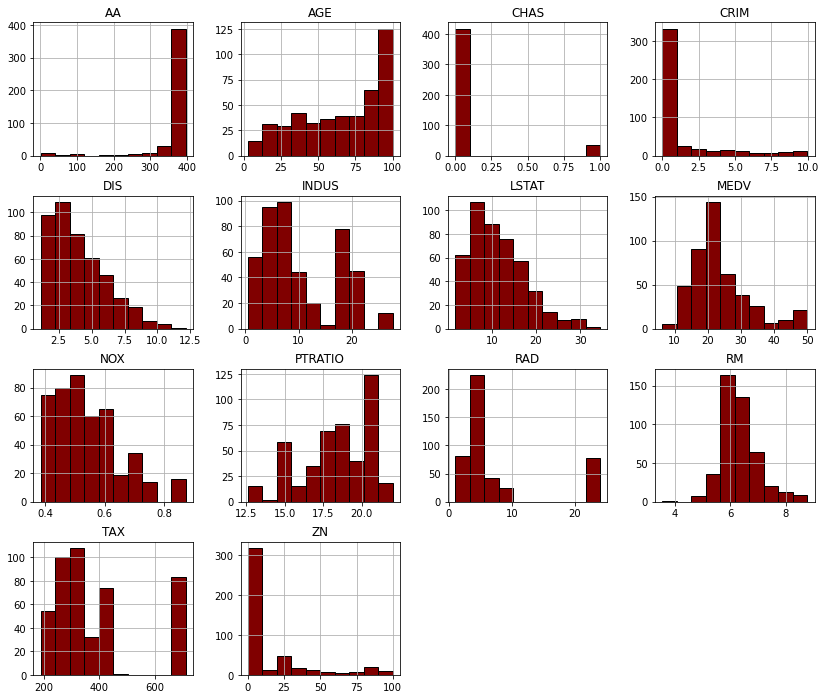

In [25]:
# I encourage you to change some of the parameters. 
#Remember what you did in the previous homework.
df.hist(edgecolor= 'black', color= 'maroon', figsize=(14,12), bins= 10)
plt.show()

## <span style= 'color:red'> 15. Create a new code block below and change the bins to 15 and the figsize to 18 x 18. Be sure to run the code.  </span>

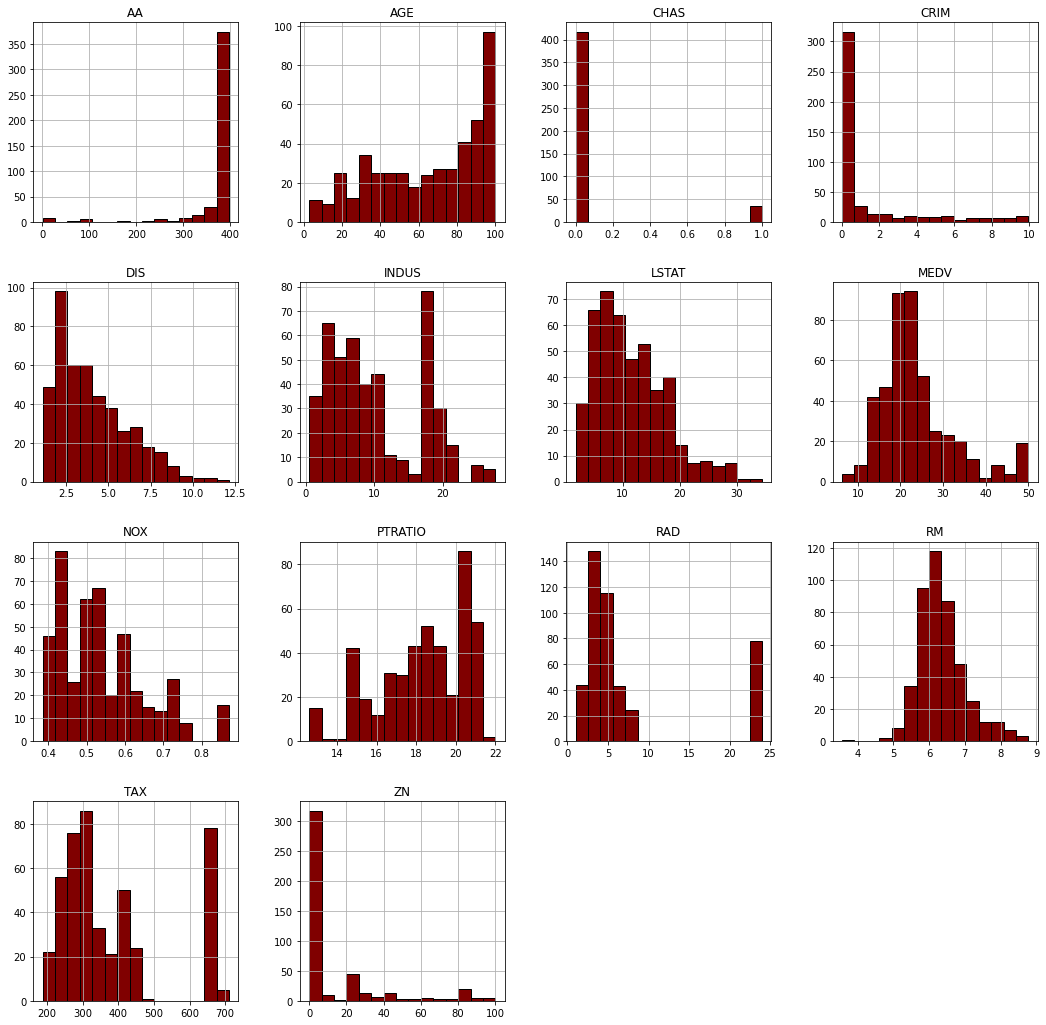

In [26]:
df.hist(edgecolor= 'black', color= 'maroon', figsize=(18,18), bins= 15)
plt.show()

## <span style= 'color:red'> 16. What happens when the df.plot function is called?  Enter your answer by adding a new code block and use markdown. </span>

we get a simliar representation of the data, but df.plot is a smoother visualization that does not involve grids like the histogram, but rather a smoother sleaker line graph 

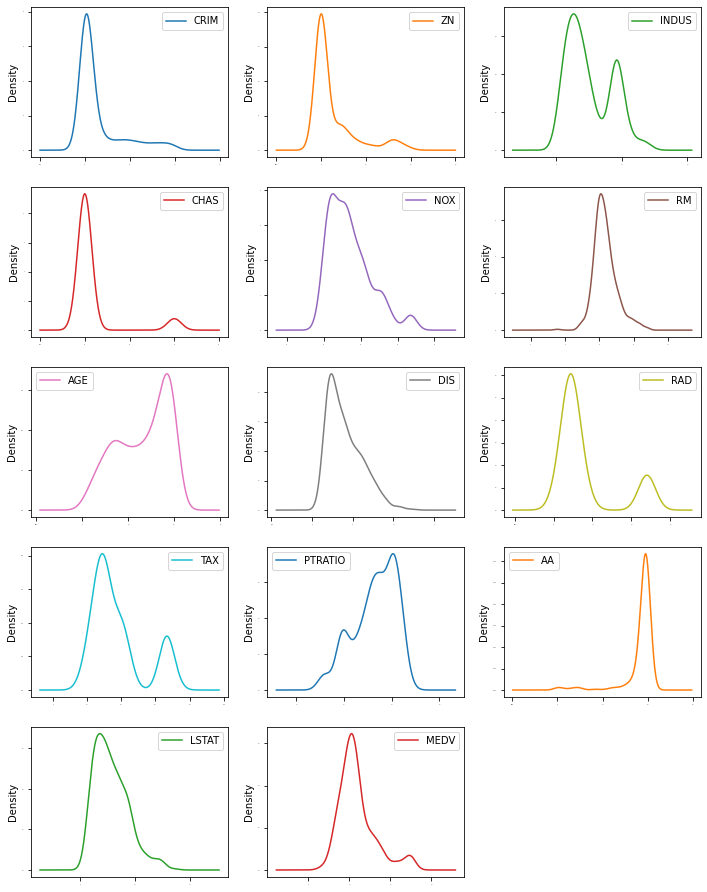

In [27]:
# Notes:  14 numeric variable, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots
df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

### Creating a Box Plot

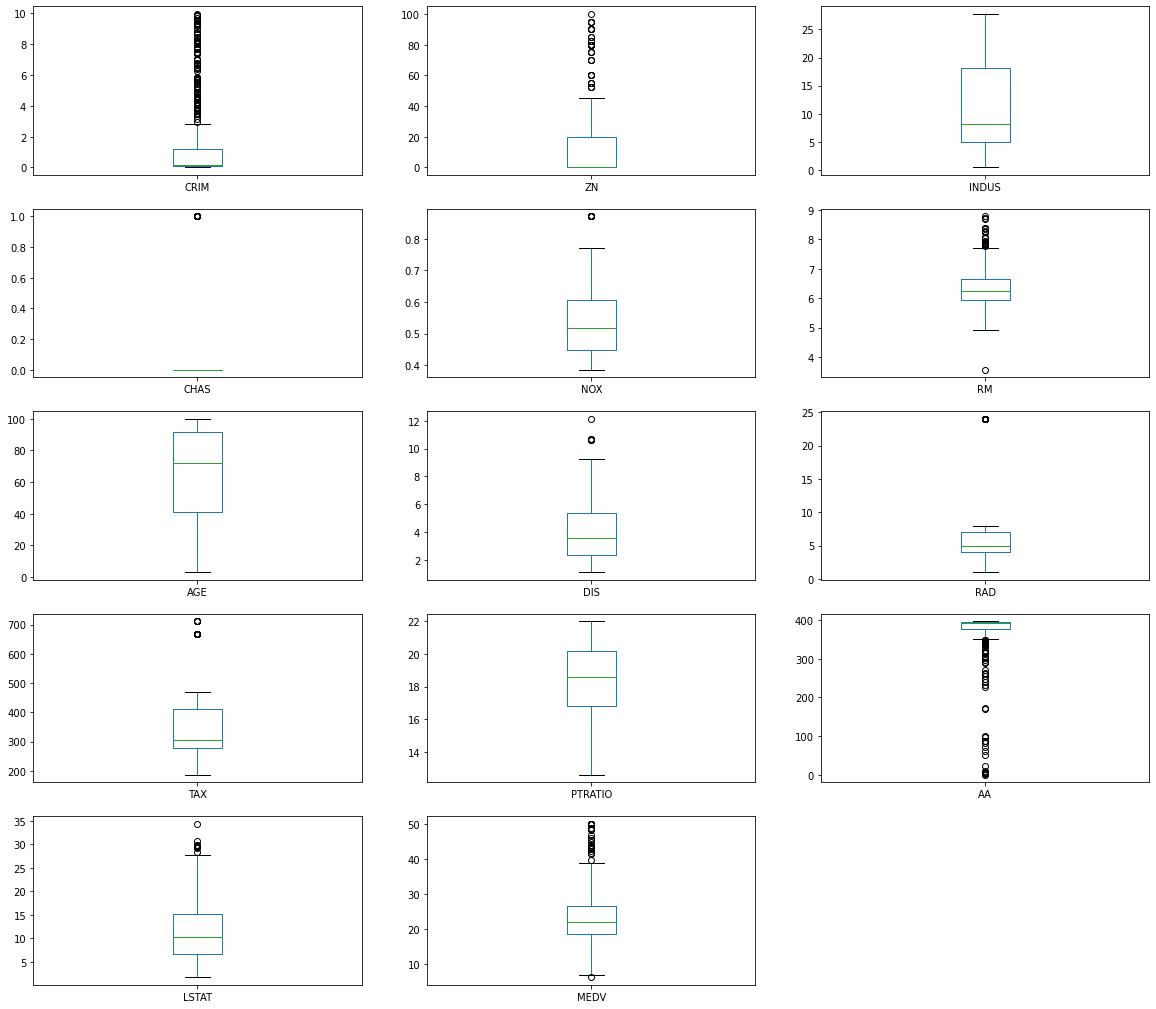

In [28]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

## <span style= 'color:red'> 17. Create a new code block below and change the boxpot layout to 2,7 and the figsize to 22 x 22. Be sure to run the code.  </span>

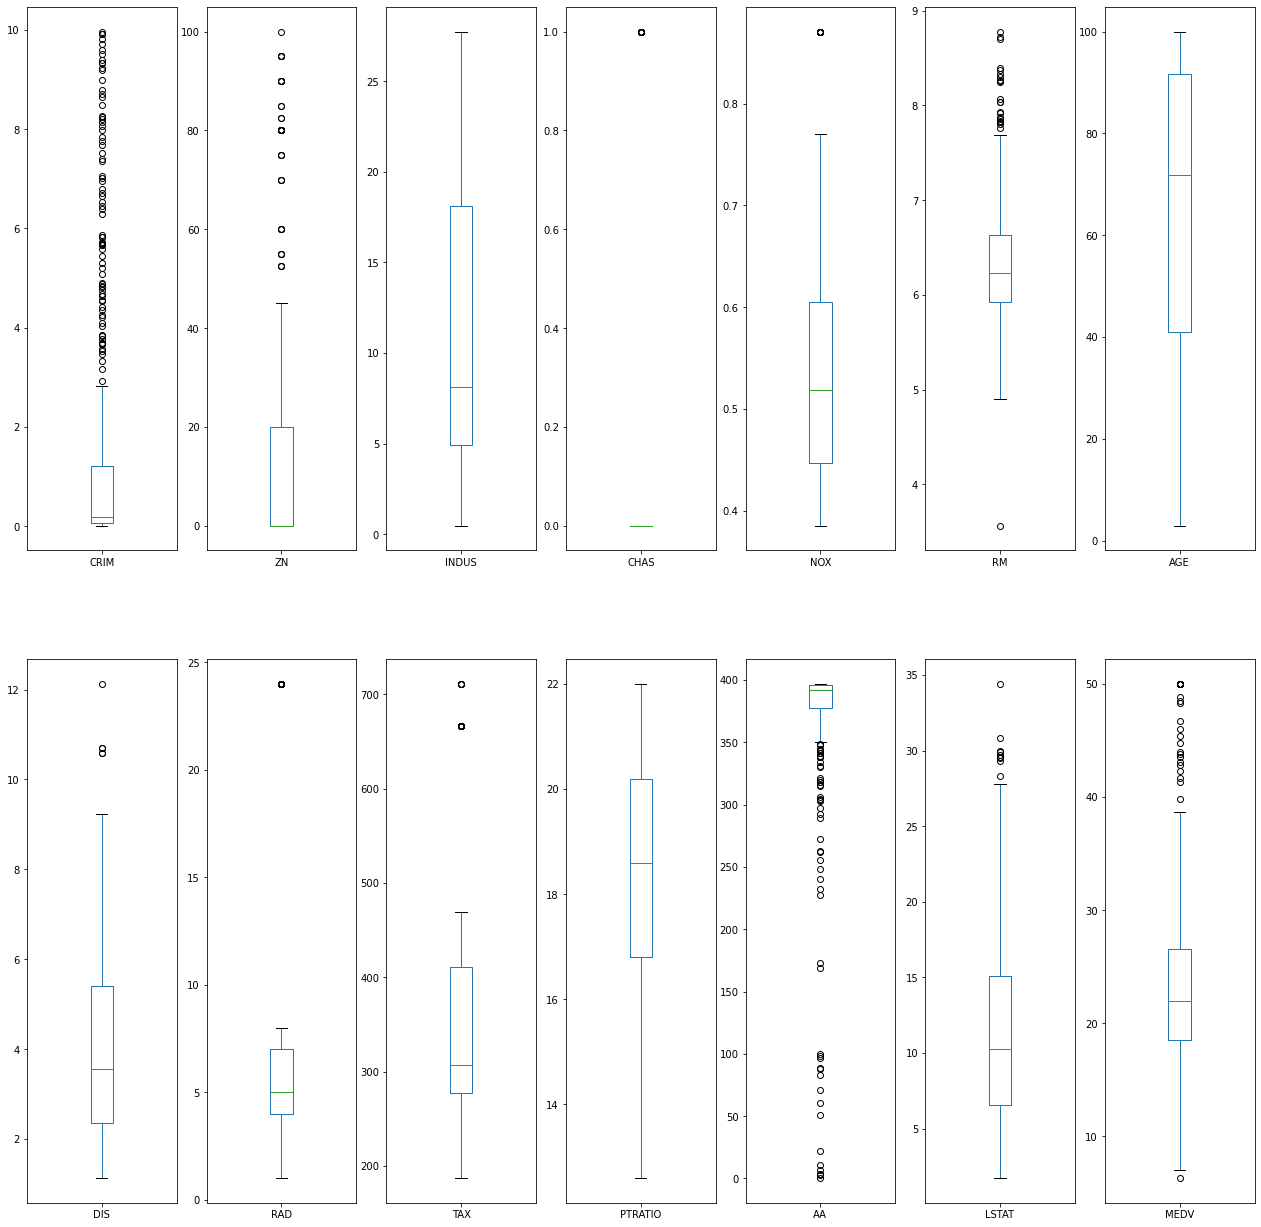

In [29]:
df.plot(kind="box", subplots=True, layout=(2,7), sharex=False, figsize=(22,22))
plt.show()

## Correlation Analysis and Feature Selection

## Correlations

In [30]:
# We will decrease the number of decimal places with the format function
pd.options.display.float_format = '{:,.3f}'.format

In [31]:
# Here we will get the correlations, with only 3 decimals.
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
CRIM,1.000,-0.281,0.574,0.050,0.637,-0.142,0.448,-0.462,0.898,0.826,0.319,-0.413,0.425,-0.286
ZN,-0.281,1.000,-0.514,-0.060,-0.501,0.307,-0.556,0.656,-0.267,-0.269,-0.364,0.150,-0.411,0.332
INDUS,0.574,-0.514,1.000,0.103,0.739,-0.365,0.606,-0.669,0.513,0.673,0.317,-0.317,0.565,-0.412
CHAS,0.050,-0.060,0.103,1.000,0.134,0.077,0.123,-0.141,0.057,0.017,-0.100,0.013,-0.009,0.154
NOX,0.637,-0.501,0.739,0.134,1.000,-0.265,0.707,-0.746,0.542,0.615,0.103,-0.358,0.537,-0.333
RM,-0.142,0.307,-0.365,0.077,-0.265,1.000,-0.188,0.139,-0.096,-0.215,-0.334,0.108,-0.607,0.740
AGE,0.448,-0.556,0.606,0.123,0.707,-0.188,1.000,-0.720,0.359,0.427,0.193,-0.224,0.573,-0.300
DIS,-0.462,0.656,-0.669,-0.141,-0.746,0.139,-0.720,1.000,-0.388,-0.444,-0.152,0.234,-0.424,0.139
RAD,0.898,-0.267,0.513,0.057,0.542,-0.096,0.359,-0.388,1.000,0.873,0.387,-0.353,0.310,-0.218
TAX,0.826,-0.269,0.673,0.017,0.615,-0.215,0.427,-0.444,0.873,1.000,0.385,-0.367,0.411,-0.346


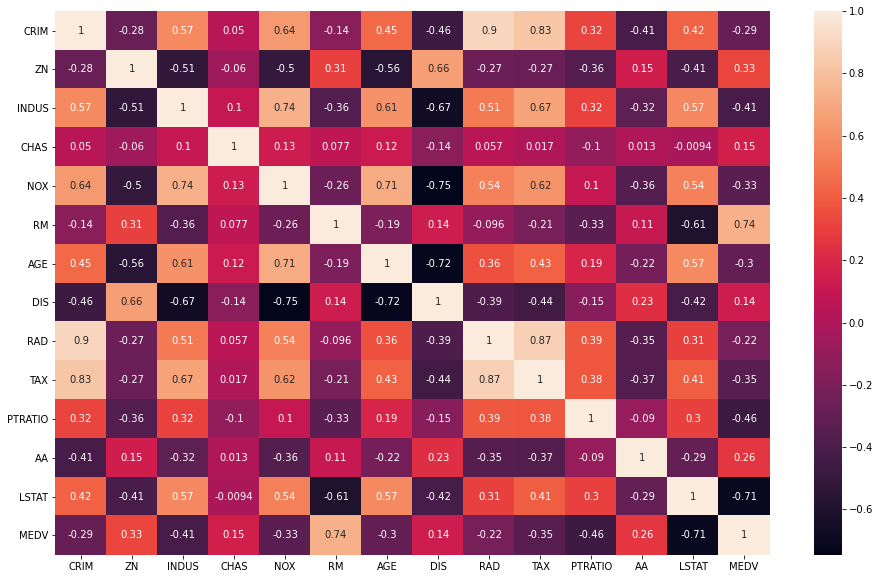

In [32]:
# We could simply look at the correlations but a heatmap is a great way to present to the general audience.
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## <span style= 'color:red'> 18. What are the top three variables that impact the target variable (MEDV)?  Remember, the most impactful can be either a positive or a negative value.  Enter your answer by adding a new code block and use markdown.  </span>

RM, ZN, AA

In [36]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.
df2= df[['CRIM','INDUS', 'TAX','MEDV']]

## <span style= 'color:red'> 19. What is happening with the code df2.corr ()?  Enter your answer by adding a new code block and use markdown. </span>

df2.corr() is a function that shows the correlation between variables in a matrix rather than the heatmap we just used

In [37]:
df2.corr()

,CRIM,INDUS,TAX,MEDV
CRIM,1.000,0.574,0.826,-0.286
INDUS,0.574,1.000,0.673,-0.412
TAX,0.826,0.673,1.000,-0.346
MEDV,-0.286,-0.412,-0.346,1.000


### Creating a Pair Plot

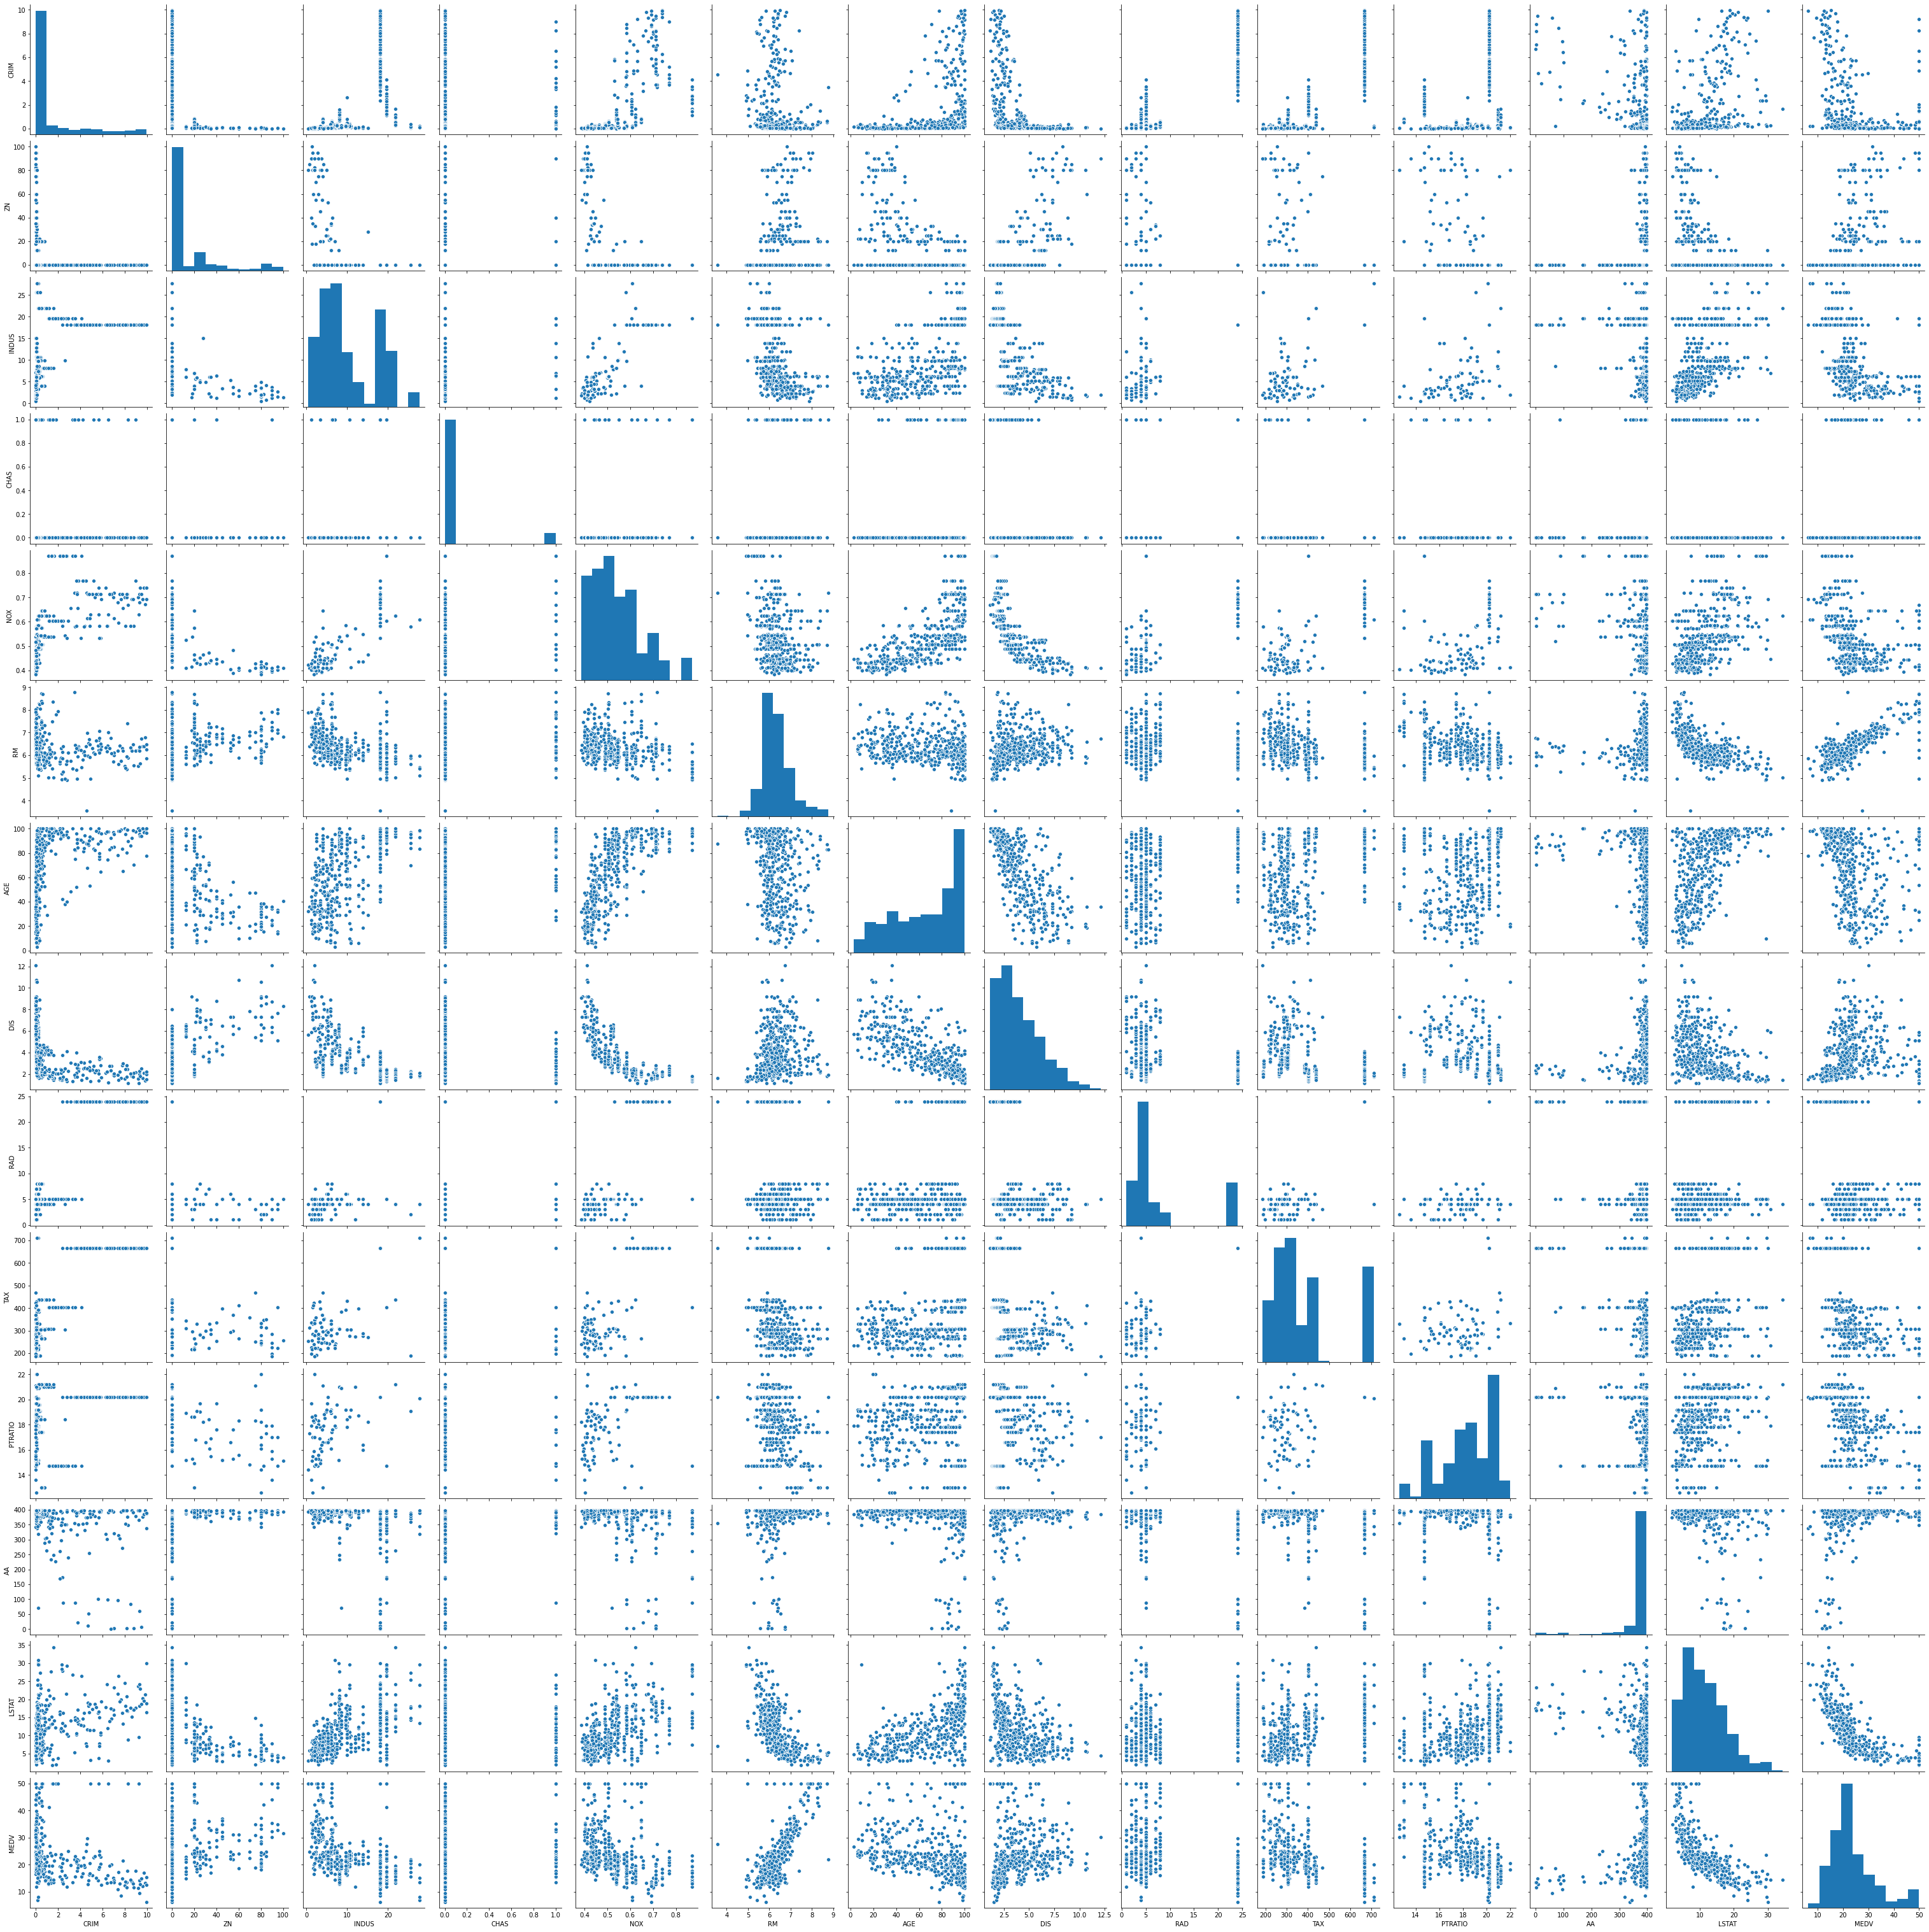

In [38]:
# Let's illustrate the correlations using color.   
sns.pairplot(df,height=3, aspect= 1);


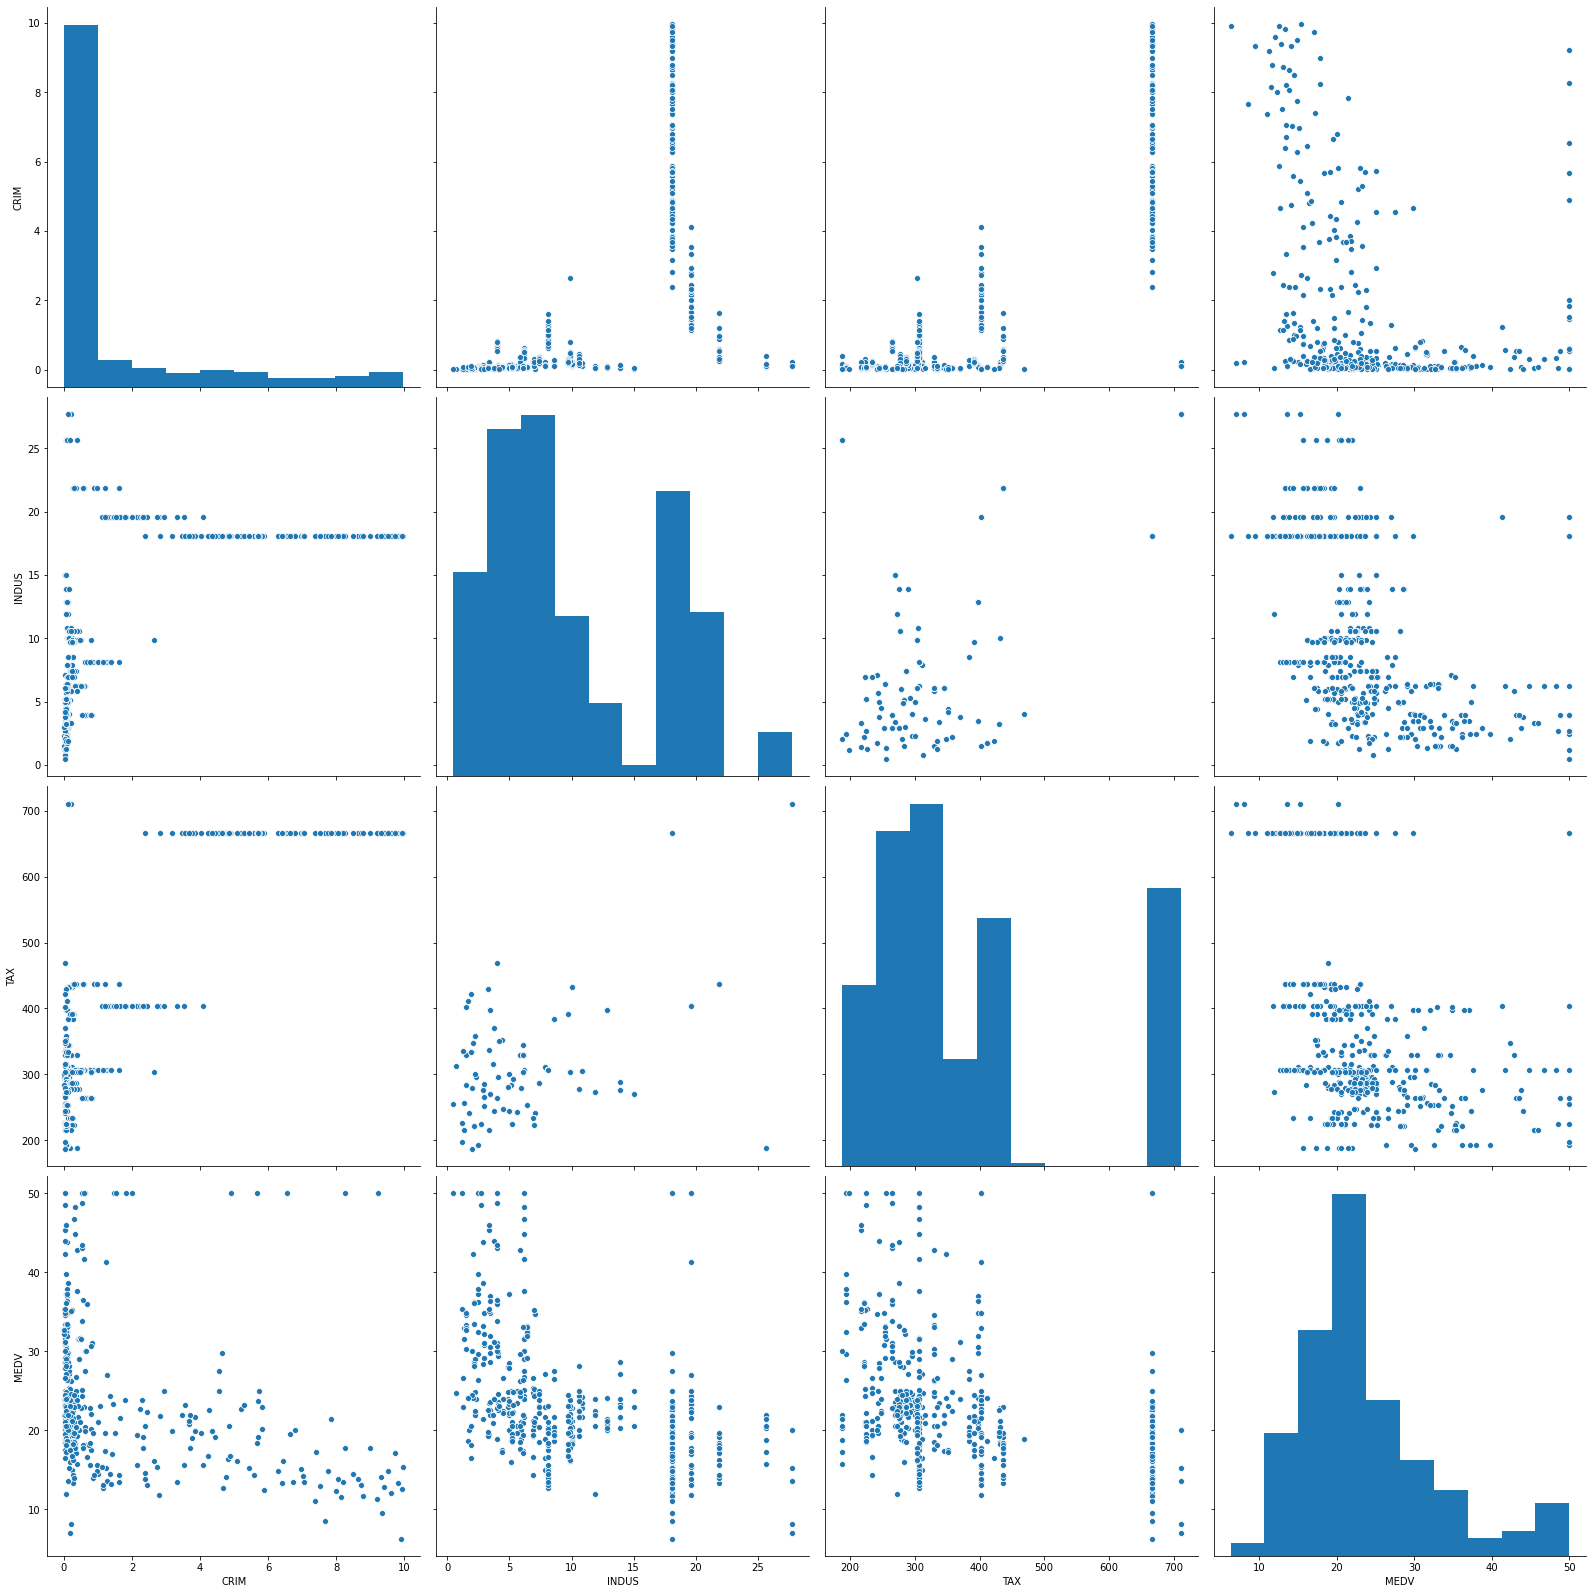

In [39]:
# Let's try the pairplot with only the variables in df2
sns.pairplot(df2, height=5.5);
plt.show()

### Creating a Heat Map

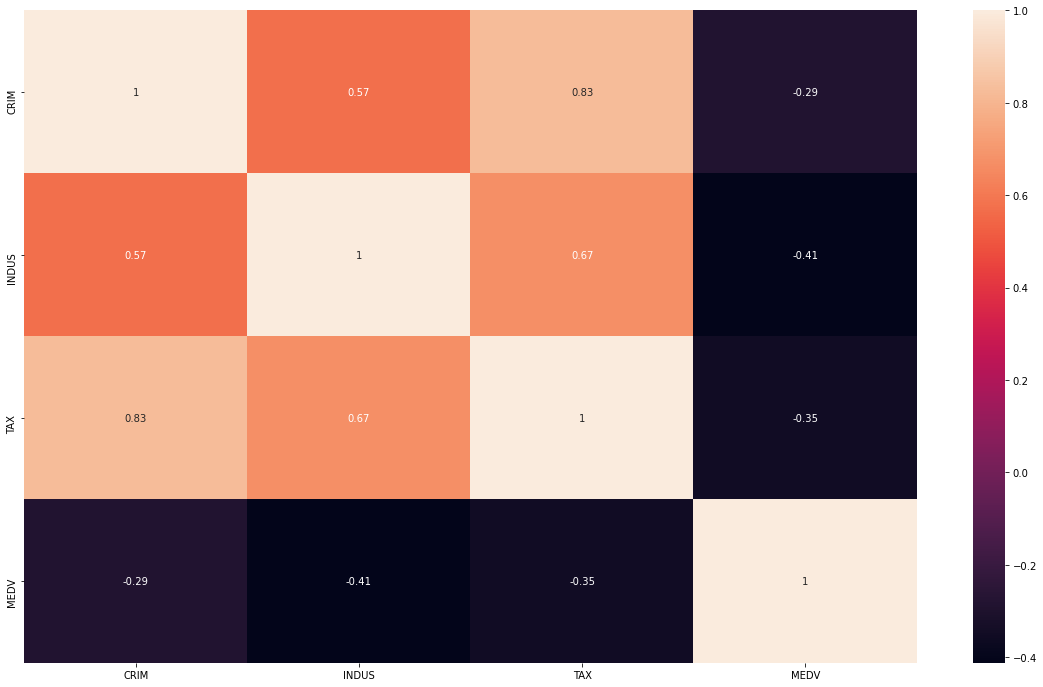

In [40]:
# Now we will make a heatmap with only the variables in df2 subset.  Again, it is very important to understand this for the final.plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

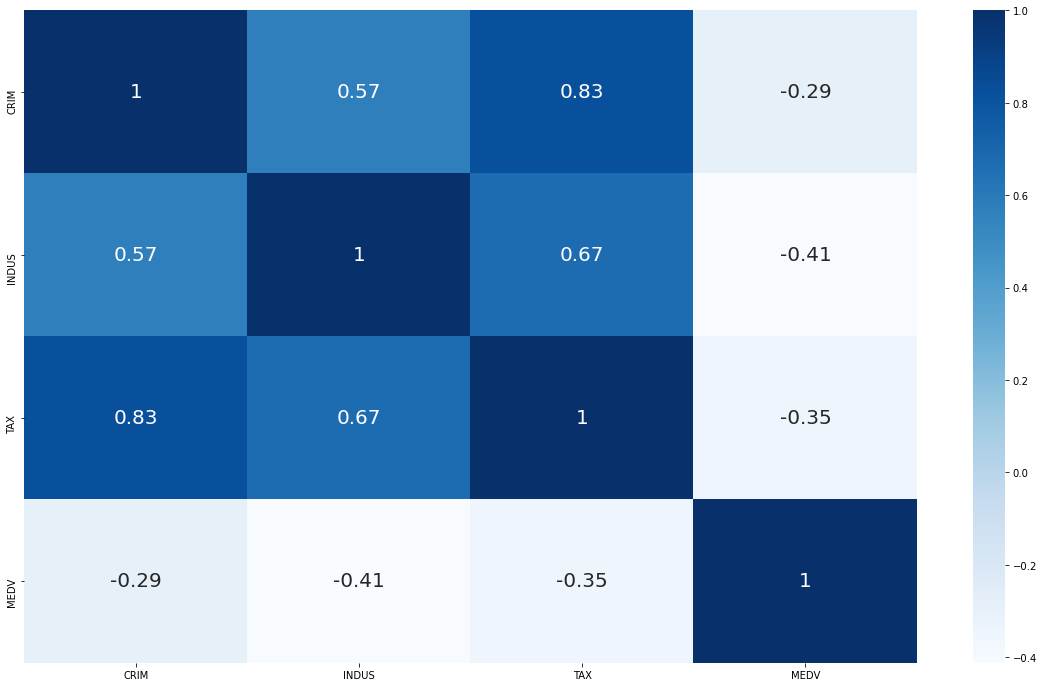

In [41]:
#If you want to change the color and font, to make the labels easier to read, use this code.
plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

### Separate the Dataset into Input & Output NumPy Arrays

In [42]:
#import train test split library
from sklearn.model_selection import train_test_split

In [44]:
# Store the dataframe values into a numPy array
array = df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array [:,3]

## <span style= 'color:red'> 20. What would the X array be if we wanted to include all rows and wanted 5 variables instead of 3 (see above)?  Of course, this would be from the df not df2 since there are not 5 variable in the df2 dataframe.  Enter your answer by adding a new code block and use markdown.  </span>

X = array [:, 0:5]

### Spilt into Input/Output Array into Training/Testing Datasets

In [45]:
# Split the dataset --> training sub-dataset:  80%, and test sub-dataset:  20%

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

## <span style= 'color:red'> 21. In the above code, do you know what code tells the model that we want a test sub-dataset of 20%?  Enter your answer by adding a new code block and use markdown.  </span>

Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

### Build and Train the Model

## <span style= 'color:red'> 22. From the code block below, what is the algorithm we are using for the model?  Enter your answer by adding a new code block and use markdown.  </span>

Linear Regression

## <span style= 'color:red'> 23. What does the intercept and coefficients tell us?  Enter your answer by adding a new code block and use markdown.  </span>

the expected mean of the value 

In [46]:
# Build the model
model=LinearRegression()

# Train the model using the training sub-dataset
model.fit(X_train, Y_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 31.393427670412926
Coefficients: [ 0.09859287 -0.42388844 -0.00931847]


In [47]:
# If we want to print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients
names_2 = ["CRIM", "INDUS", "TAX"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set
coeffs = set(coeffs_zip)

# Print (coeffs)
for coef in coeffs:
    print (coef, "\n")

('INDUS', -0.4238884417716133) 

('TAX', -0.009318474474503407) 

('CRIM', 0.0985928723914378) 



In [48]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Calculate R-Squared

In [50]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.1547331337359037


### Notes: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tell us how good the independent variables predict the dependent variable.  This is very low.  Think about how you could increase the R-squared. What variables would you use?  This will be important for the final.

## Prediction

In [51]:
# CRIM = 12
# INDUS = 10
# TAX = 450
model.predict([[12,10,450]])

array([24.14434421])

## <span style= 'color:red'> 24. What is the predicted amount of the home with the variables and values you have entered above? Enter your answer by adding a new code block and use markdown. You can look up in the description for the dataset at the beginning of the assignment to refresh your memory, if needed.  </span>

$24,000

In [52]:
# CRIM = 2
# INDUS = 30
# TAX = 50
model.predict([[2,30,50]])

array([18.40803644])

## <span style= 'color:red'> 25. What is the predicted amount of the home with the variables and values you have entered above? Enter your answer by adding a new code block and use markdown. </span>

$18,000

## Evaluate/Validate Algorithm/Model, Using K-Fold Cross Validation

In [53]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -64.35862748210982


### Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see there is a -64 avg of all error (mean of square errors). This value would traditionally be a positive value but scikit reports this value as a negative value. If the square root would have been evaluated, the value would have been around 8.

In [54]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# For Linear regression, we can use explained variance value to evaluate the model/algorithm
scoring = 'explained_variance'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.19023822025958687


### In the above code we are using a different scoring parameter.  Here we use the Explained Varience.  Best possible score is 1.0, lower values are worse.

#### To learn more about Scikit Learning scoring [https://scikit-learn.org/stable/modules/model_evaluation.html]

## <span style= 'color:red'> 26. What are your thoughts on this process?  Do you have any quesitons? Enter your answer by adding a new code block and use markdown.  </span>

An interesting approach to learning the syntax and understand from a data science perspective 